# Install Required Libraries
# These commands install necessary libraries for bioinformatics tasks, data manipulation, and visualization

In [1]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seqlogo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install polars

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seqlogo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pyarrow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install fastparq

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement fastparq (from versions: none)
ERROR: No matching distribution found for fastparq
Note: you may need to restart the kernel to use updated packages.


# Import Necessary Libraries
# These imports bring in the functions and classes needed for the analysis

In [12]:
import matplotlib.pyplot as plt

In [13]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from Bio import motifs
from Bio.Seq import Seq
import seqlogo
import numpy as np
import seaborn as sns
from seqlogo.seqlogo import _sizes
import subprocess
# Configure Seaborn Theme
# Setting up the visual theme for seaborn plots
sns.set_theme()
_sizes['xxlarge'] = 22

# Define Path for Data Files
# Path where the FASTA files and other data are stored

In [14]:
path = "/cluster/home/essaak/Desktop/Mapping/Mango_RNA/05_Mappings"

# Function: Convert FASTA to DataFrame
# This function parses the FASTA file and converts the data into a structured pandas DataFrame
# This function extracts information from the FASTA file, such as sequence identifiers, sizes, positions, and mappings, and stores them in lists. It then creates a DataFrame using the lists and returns it

In [15]:
from Bio import SeqIO
import pandas as pd

def fasta_to_dataframe(filename):
    centroids = []
    seqs = []
    sizes = []
    positions = []
    mapped = []
    lengths = []
    sequences = []
    for seq_record in SeqIO.parse(filename, 'fasta'):
        enteries = seq_record.id.split(';')
        if len(enteries) == 5:
            centroids.append(enteries[0].split('=')[1])
            seqs.append(enteries[1].split('=')[1])
            sizes.append(enteries[2].split('=')[1])
            positions.append(enteries[3].split('=')[1])
            mapped.append(enteries[4].split('=')[1])
        elif len(enteries) == 3:
            centroids.append(enteries[0].split('=')[1])
            seqs.append(enteries[1].split('=')[1])
            sizes.append(enteries[2].split('=')[1])
        lengths.append(len(seq_record))
        sequences.append(str(seq_record.seq))

    df = pd.DataFrame({
        'centeriod': centroids,
        'seqs': seqs,
        'size': sizes,
        'position': positions,
        'mapped': mapped,
        'length': lengths,
        'sequence': sequences
    })

    return df

This function converts data from a FASTA file format into a DataFrame, which is a common data structure in Python provided by libraries like Pandas for tabular data manipulation
Formatted string (using an f-string) that includes a variable path (which should have been previously defined) and a specific file name "RNA_017_2022-004_R4_TSS_in_20230605_clusters_90.fasta". This represents the file path to a FASTA file that contains biological sequence data.

In [16]:
r2 = fasta_to_dataframe(f"{path}/RNA_017_2022-002_R2_TSS_in_20230418_clusters_90.fa")

In [17]:
r2.shape

(71952, 7)

.to_parquet(), This is a Pandas DataFrame method that allows you to save the DataFrame to a Parquet file. You provide the file path as an argument.

f"{path}/RNA_R2.pq": This is a formatted string that constructs the full file path to save the Parquet file. It uses the variable path (have been defined earlier in the code) to determine the directory where the file should be saved, and the file name "RNA_R2.pq" is appended to the directory path.

In [18]:
r2.to_parquet(f"{path}/RNA_R2.pq")

The line of code r2 = pd.read_parquet(f"{path}//RNA_R2.pq") is used to read data from a Parquet file back into a Pandas DataFrame in Python

In [19]:
r2 = pd.read_parquet(f"{path}//RNA_R2.pq")

The provided lines of code seem to be performing various data type conversions and manipulations on the DataFrame r2.

r2.position = r2.position.astype(int): This line converts the data type of the 'position' column in the DataFrame r2 to integers. This assumes that the 'position' column contains numeric values that can be safely converted to integers.

r2['size'] = r2['size'].astype(int): Similarly, this line converts the data type of the 'size' column in r2 to integers.

r2.mapped = r2.mapped.astype(int): This line converts the data type of the 'mapped' column in r2 to integers.

r2.seqs = r2.seqs.astype(int): Similarly, this line converts the data type of the 'sequence' column in r2 to integers.

r2.sequence = r2.sequence.str.upper(): This line converts the text in the 'sequence' column of DataFrame r2 to uppercase. It makes all the letters in the 'sequence' column's strings uppercase.

In [20]:
r2.position = r2.position.astype(int)
r2['size'] = r2['size'].astype(int)
r2.mapped = r2.mapped.astype(int)
r2.seqs = r2.seqs.astype(int)
r2.sequence = r2.sequence.str.upper()

In [21]:
r2

,centeriod,seqs,size,position,mapped,length,sequence
0,M00493:565:000000000-JRNM9:1:1116:22284:15326,2,6,104,6,219,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...
1,ab89ae7d-da33-4596-8fb3-e3d3cdc65743,2,2,94,4,162,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...
2,M00493:565:000000000-JRNM9:1:2118:27640:17638,2,15,51,10,221,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...
3,6412fc40-03de-4f54-864e-d7a4dbc063c3,1,1,67,3,153,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...
4,a62420c6-9f0a-48cc-960c-dde0c857e30b,1,1,83,4,216,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...
...,...,...,...,...,...,...,...
71947,M00493:565:000000000-JRNM9:1:2117:22884:2876,4,15,159,15,219,GTCGGATGCCTCAGGTTTATGCGTTGTGCTGGGTTCTATAGGGTAC...
71948,f9587ab3-9ca1-4af4-8230-d2db37e13241,1,1,135,3,206,GTCGGATGCCACATCTTACCTATCGGGGCCACGTGGGTAGTGTCTA...
71949,M00493:565:000000000-JRNM9:1:1115:16164:21354,10,36,34,31,220,GTCGGATGCCAATGGCGGAGTTATGTAAATTTTGTAAGTGATTGGG...
71950,M00493:565:000000000-JRNM9:1:1115:22975:7680,14,47,155,18,220,GTCGGATGCCGCATTCTGTTTATTGGATTCAACCACTTTGGAGATT...


The code r2.dtypes is used to retrieve the data types of each column

In [22]:
r2.dtypes

centeriod    object
seqs          int64
size          int64
position      int64
mapped        int64
length        int64
sequence     object
dtype: object

The line of code r2['source'] = "R2" is adding a new column called 'source' to the DataFrame r2 and filling it with the value "R2" for every row in the DataFrame. Optional, in case of analysing multiple samples all together

In [ ]:
r2['source'] = "R2"

In [ ]:
Optional: After executing this line of code, the resulting DataFrame rs will be a concatenation of multi sample DataFrames. This can be useful when you have separate DataFrames containing related data that you want to combine into a single DataFrame for easier analysis or further processing.

In [24]:
rs = pd.concat([r2], ignore_index=False)

In [25]:
len(rs)

71952

Optional: rs.source.value_counts() will return a Series with the count of occurrences for each unique value in the 'source' column of the concatenated DataFrame rs. This can provide insights into how many rows in the DataFrame belong to each source.

In [26]:
rs.source.value_counts()

R2    71952
Name: source, dtype: int64

When this line of code is executed, the DataFrame rs will be saved as a Parquet file named "RNA.pq" in the specified directory. This can be useful for storing the combined and processed data for future use, sharing, or analysis. Parquet files are efficient for storing and reading large datasets, making them a good choice for storing data.

In [27]:
rs.to_parquet(f"{path}/RNA.pq")

After executing this line of code, the DataFrame rs will contain the data that was previously saved in the Parquet file "RNA.pq". This allows to work with the data again in a DataFrame for further analysis, manipulation, or visualization.

In [28]:
rs = pd.read_parquet(f"{path}/RNA.pq")

rs[rs.length > 300].shape will give you a tuple containing the number of rows and columns in the filtered DataFrame where the length is greater than 300. This can be used to understand how many rows match the specified condition and how many columns are present in the filtered subset.

In [29]:
rs[rs.length > 300].shape

(59, 8)

The line of code helps to create a line plot using the matplotlib library. This plot will show the sorted values of the 'length' column from the DataFrame r2.

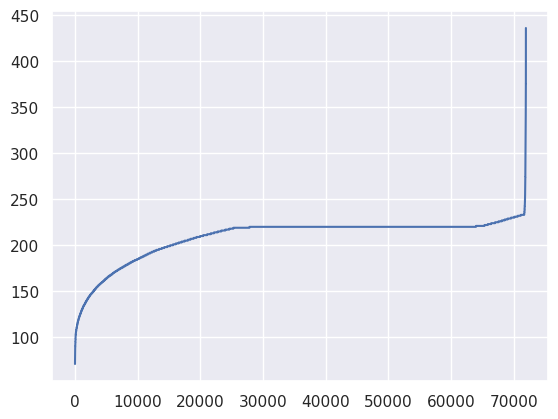

In [30]:
plt.plot(sorted(r2.length.values))

trying to create a histogram using Matplotlib's plt.hist function. You're providing the position values (TSS) from a DataFrame named r2.

(array([3.7890e+03, 8.6020e+03, 1.2739e+04, 1.5859e+04, 1.6322e+04,
        1.3862e+04, 7.4700e+02, 1.9000e+01, 7.0000e+00, 6.0000e+00]),
 array([ 11. ,  38.3,  65.6,  92.9, 120.2, 147.5, 174.8, 202.1, 229.4,
        256.7, 284. ]),
 <BarContainer object of 10 artists>)

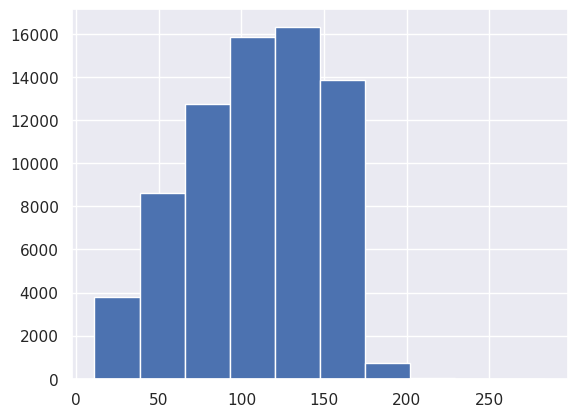

In [31]:
plt.hist(r2.position.values)

Calculate summary statistics, including specific percentiles. This will give insights into the distribution of the data in the position column (TSS). The percentiles we specified are 0.03, 0.1, 0.2, 0.9, and 0.99

In [32]:
r2.position.describe(percentiles=[0.03,0.1,0.2,0.9,0.99])

count    71952.000000
mean       108.500097
std         40.272540
min         11.000000
3%          30.000000
10%         51.000000
20%         70.000000
50%        112.000000
90%        160.000000
99%        175.000000
max        284.000000
Name: position, dtype: float64

This line of code is used to understand the number of rows in the DataFrame r2 that meet specific conditions (Number of data point in r2 whose TSS position is less then 18).

In [33]:
r2[r2.position < 18].shape#,r4[r4.length > 230].shape

(400, 8)

In [34]:
r2

,centeriod,seqs,size,position,mapped,length,sequence,source
0,M00493:565:000000000-JRNM9:1:1116:22284:15326,2,6,104,6,219,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...,R2
1,ab89ae7d-da33-4596-8fb3-e3d3cdc65743,2,2,94,4,162,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...,R2
2,M00493:565:000000000-JRNM9:1:2118:27640:17638,2,15,51,10,221,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...,R2
3,6412fc40-03de-4f54-864e-d7a4dbc063c3,1,1,67,3,153,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...,R2
4,a62420c6-9f0a-48cc-960c-dde0c857e30b,1,1,83,4,216,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...,R2
...,...,...,...,...,...,...,...,...
71947,M00493:565:000000000-JRNM9:1:2117:22884:2876,4,15,159,15,219,GTCGGATGCCTCAGGTTTATGCGTTGTGCTGGGTTCTATAGGGTAC...,R2
71948,f9587ab3-9ca1-4af4-8230-d2db37e13241,1,1,135,3,206,GTCGGATGCCACATCTTACCTATCGGGGCCACGTGGGTAGTGTCTA...,R2
71949,M00493:565:000000000-JRNM9:1:1115:16164:21354,10,36,34,31,220,GTCGGATGCCAATGGCGGAGTTATGTAAATTTTGTAAGTGATTGGG...,R2
71950,M00493:565:000000000-JRNM9:1:1115:22975:7680,14,47,155,18,220,GTCGGATGCCGCATTCTGTTTATTGGATTCAACCACTTTGGAGATT...,R2


In [35]:
rs.head()

,centeriod,seqs,size,position,mapped,length,sequence,source
0,M00493:565:000000000-JRNM9:1:1116:22284:15326,2,6,104,6,219,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...,R2
1,ab89ae7d-da33-4596-8fb3-e3d3cdc65743,2,2,94,4,162,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...,R2
2,M00493:565:000000000-JRNM9:1:2118:27640:17638,2,15,51,10,221,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...,R2
3,6412fc40-03de-4f54-864e-d7a4dbc063c3,1,1,67,3,153,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...,R2
4,a62420c6-9f0a-48cc-960c-dde0c857e30b,1,1,83,4,216,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...,R2


This line of code is calculating summary statistics on the 'mapped' column for sample R2. The specified percentiles are 0.5, 0.8, 0.9, and 0.99. This will give insights into the distribution of the 'mapped' values within each group of 'source'.

In [36]:
rs.groupby('source')['mapped'].describe(percentiles=[0.5,0.8,0.9,0.99])

,count,mean,std,min,50%,80%,90%,99%,max
source,,,,,,,,,
R2,71952.0,33.227082,168.736636,3.0,12.0,36.0,58.0,298.0,11469.0


get_prom_utr function code. This function takes a row r from the DataFrame and calculates two new columns, promoter 'prom' and 5'UTR 'utr', based on the 'sequence' and 'position' columns. The 'prom' column contains the substring of the 'sequence' column from the beginning up to the 'position' - 1 index, and the 'utr' column contains the substring of the 'sequence' column from the 'position' index onward.

In [37]:
def get_prom_utr(r):
    r['prom'] = r['sequence'][:r['position']-1]
    r['utr'] = r['sequence'][r['position']:]
    return r

The code rs = rs.apply(get_prom_utr, axis=1) is using the apply method on the DataFrame rs to apply the function get_prom_utr row-wise along the axis 1

In [38]:
rs = rs.apply(get_prom_utr, axis=1)

These lines of code are calculating the lengths of the sequences in the 'prom' and 'utr' columns for each row of the DataFrame rs and storing these lengths in new columns 'plen' (promoter length) and 'ulen' (5'UTR length), respectively. 

In [39]:
rs['plen'] = rs.prom.str.len()
rs['ulen'] = rs.utr.str.len()

In [40]:
print( rs.prom)

0        GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...
1        GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...
2        GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...
3        GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...
4        GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...
                               ...                        
71947    GTCGGATGCCTCAGGTTTATGCGTTGTGCTGGGTTCTATAGGGTAC...
71948    GTCGGATGCCACATCTTACCTATCGGGGCCACGTGGGTAGTGTCTA...
71949                    GTCGGATGCCAATGGCGGAGTTATGTAAATTTT
71950    GTCGGATGCCGCATTCTGTTTATTGGATTCAACCACTTTGGAGATT...
71951    GTCGGATGCCCATGGTCTGATCGTAAGTTTGGAGTTTAATCCTGTA...
Name: prom, Length: 71952, dtype: object


This code is using the shape attribute and the .query() method to analyze the dimensions (number of rows and columns) of the DataFrame rs and a filtered subset of it based on specific conditions.
Here's what the code does: rs.query("plen > 80 and ulen > 30").shape: This applies a query to the DataFrame rs, filtering rows where the value in the 'plen' column is greater than 80 and the value in the 'ulen' column is greater than 30. It then calculates the dimensions (number of rows and columns) of this filtered subset.

In [41]:
rs.shape, rs.query("plen > 80 and ulen > 30").shape

((71952, 12), (52386, 12))

In [42]:
rs.head()

,centeriod,seqs,size,position,mapped,length,sequence,source,prom,utr,plen,ulen
0,M00493:565:000000000-JRNM9:1:1116:22284:15326,2,6,104,6,219,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...,R2,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...,GGTCGGGCAGTTTTAGCTTTCGCTTCTAATCACGAGCTGTATCATT...,103,115
1,ab89ae7d-da33-4596-8fb3-e3d3cdc65743,2,2,94,4,162,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...,R2,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...,TATGTCAATTGAGTTAATTGACAGAACTCTCTTTATCGGTGCTTGG...,93,68
2,M00493:565:000000000-JRNM9:1:2118:27640:17638,2,15,51,10,221,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...,R2,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...,TGTCCTTCTGTCCGTCACTCCGTTCATCCTCACTGGGTAAATGTTA...,50,170
3,6412fc40-03de-4f54-864e-d7a4dbc063c3,1,1,67,3,153,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...,R2,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...,GGTGAAGTATGTAAAACGATGTAGCAGTTCTATTTTTTTTCACAAT...,66,86
4,a62420c6-9f0a-48cc-960c-dde0c857e30b,1,1,83,4,216,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...,R2,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...,TTATGAAGGATGGTTCATTTTCAATTCGCAGTTCTGTGCATTAGCG...,82,133


The code performs several operations on the DataFrame rs.
rs = rs.query("length < 300"): This filters the DataFrame rs to keep only the rows where the value in the 'length' column is less than 300.
rs.prom = rs.prom.str[10:]: This modifies the 'prom' column of the DataFrame rs by removing the first 10 characters from each string in the column. It's essentially removing the first 10 characters from each string.
rs.utr = rs.utr.str[:-10]: This modifies the 'utr' column of the DataFrame rs by removing the last 10 characters from each string in the column. It's removing the last 10 characters from each string.

In [43]:
rs = rs.query("length < 300")
rs.prom = rs.prom.str[10:]
rs.utr = rs.utr.str[:-10]

The code continues to manipulate the DataFrame rs and introduces some new columns.
rs['plen'] = rs.prom.str.len(): This adds a new column named 'plen' to the DataFrame rs. The values in this column are calculated by getting the length (number of characters) of each string in the 'prom' column.
rs['ulen'] = rs.utr.str.len(): Similarly, this adds a new column named 'ulen' to the DataFrame rs. The values in this column are calculated by getting the length of each string in the 'utr' column.
frs = rs.query("plen >= 40"): This creates a new DataFrame frs by filtering the DataFrame rs. It keeps only the rows where the value in the 'plen' column is greater than or equal to 40.

In [44]:
rs['plen'] = rs.prom.str.len()
rs['ulen'] = rs.utr.str.len()
frs = rs.query("plen >= 40")

The code use the .to_parquet() method to save the DataFrame rs to a Parquet file. 

In [45]:
rs.to_parquet(f"{path}/data_uniq.pq")

Using the pd.read_parquet() function to read data from a Parquet file back into a DataFrame. 

In [46]:
rs = pd.read_parquet(f"{path}/data_uniq.pq")

In [47]:
rs.groupby('source').count()

,centeriod,seqs,size,position,mapped,length,sequence,prom,utr,plen,ulen
source,,,,,,,,,,,
R2,71893,71893,71893,71893,71893,71893,71893,71893,71893,71893,71893


In [48]:
rs.head()

,centeriod,seqs,size,position,mapped,length,sequence,source,prom,utr,plen,ulen
0,M00493:565:000000000-JRNM9:1:1116:22284:15326,2,6,104,6,219,GTCGGATGCCCAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGA...,R2,CAGCCTATAGTGTTTTTAGAATGTGACTTAGTTGGAAGTACGGTAT...,GGTCGGGCAGTTTTAGCTTTCGCTTCTAATCACGAGCTGTATCATT...,93,105
1,ab89ae7d-da33-4596-8fb3-e3d3cdc65743,2,2,94,4,162,GTCGGATGCCTAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAG...,R2,TAATTGACCCGTTCGGTGGTGTTGGATTTAATTTAGATATTGTGTC...,TATGTCAATTGAGTTAATTGACAGAACTCTCTTTATCGGTGCTTGG...,83,58
2,M00493:565:000000000-JRNM9:1:2118:27640:17638,2,15,51,10,221,GTCGGATGCCATGTGTCCATAGGCGGCACTCACTTTGCATATTAAG...,R2,ATGTGTCCATAGGCGGCACTCACTTTGCATATTAAGGGGT,TGTCCTTCTGTCCGTCACTCCGTTCATCCTCACTGGGTAAATGTTA...,40,160
3,6412fc40-03de-4f54-864e-d7a4dbc063c3,1,1,67,3,153,GTCGGATGCCATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCG...,R2,ATCATCATATTCTTTTAGCGTTTGGGGCTTTTGCCGTAGCGTACTT...,GGTGAAGTATGTAAAACGATGTAGCAGTTCTATTTTTTTTCACAAT...,56,76
4,a62420c6-9f0a-48cc-960c-dde0c857e30b,1,1,83,4,216,GTCGGATGCCAGCCAGTATATCTATGCGTAACGGTAAGACGGTGGG...,R2,AGCCAGTATATCTATGCGTAACGGTAAGACGGTGGGGTTTGATGTA...,TTATGAAGGATGGTTCATTTTCAATTCGCAGTTCTGTGCATTAGCG...,72,123


In [49]:
frs.groupby('source').count()

,centeriod,seqs,size,position,mapped,length,sequence,prom,utr,plen,ulen
source,,,,,,,,,,,
R2,64966,64966,64966,64966,64966,64966,64966,64966,64966,64966,64966


(array([7.6480e+03, 9.0320e+03, 1.0386e+04, 1.1170e+04, 1.1561e+04,
        1.1601e+04, 3.5140e+03, 4.5000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 40. ,  59.2,  78.4,  97.6, 116.8, 136. , 155.2, 174.4, 193.6,
        212.8, 232. ]),
 <BarContainer object of 10 artists>)

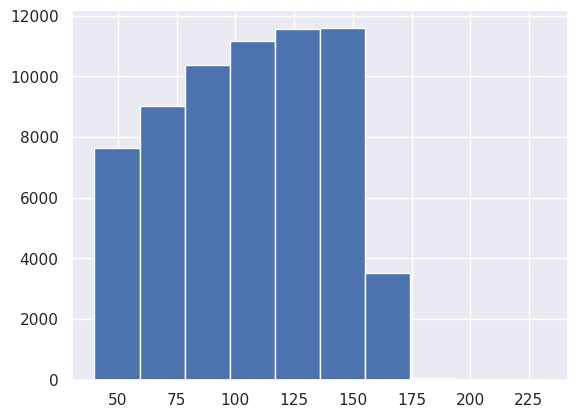

In [50]:
#plt.plot(sorted(frs.query("source=='R1'").plen))
plt.hist(frs.query("source=='R2'").plen)

In [51]:
rs.query("source=='R2'").plen.describe()

count    71893.00000
mean        97.45003
std         40.20524
min          0.00000
25%         67.00000
50%        101.00000
75%        131.00000
max        232.00000
Name: plen, dtype: float64

In [52]:
frs = rs.query("plen >= 95")

In [53]:
frs.groupby('source').count()

,centeriod,seqs,size,position,mapped,length,sequence,prom,utr,plen,ulen
source,,,,,,,,,,,
R2,39550,39550,39550,39550,39550,39550,39550,39550,39550,39550,39550


In [54]:
rs.groupby('source')['mapped'].describe(percentiles=[0.5,0.6,0.85,0.9,0.99])

,count,mean,std,min,50%,60%,85%,90%,99%,max
source,,,,,,,,,,
R2,71893.0,33.22087,168.788731,3.0,12.0,17.0,45.0,58.0,298.0,11469.0


In [56]:
hrs2 = rs.query("source=='R2' and mapped >= 45")

In [57]:
hrs2

,centeriod,seqs,size,position,mapped,length,sequence,source,prom,utr,plen,ulen
7,9147842d-8c6c-4bdd-98d3-96c92a699c67,1,1,93,61,149,GTCGGATGCCAAAATTACCGTATGTACAGGGCAAGCTCTCTGTCTG...,R2,AAAATTACCGTATGTACAGGGCAAGCTCTCTGTCTGAATGACCATG...,ACCGTAGCGTGGATTGATCTTTGCATTTAGGCGGCGCCAGTTCGGG,82,46
16,M00493:565:000000000-JRNM9:1:2116:15499:8000,5,17,127,104,220,GTCGGATGCCCTAACACTTGATTAAGGAATTTATGTTCACTTTTGC...,R2,CTAACACTTGATTAAGGAATTTATGTTCACTTTTGCGTCTAAGCGA...,GGAAGCTTAGAGAATAGTCGATCTGGTAACATCCTCGCATGATGTC...,116,83
17,M00493:565:000000000-JRNM9:1:2116:15499:8000,5,17,128,161,220,GTCGGATGCCCTAACACTTGATTAAGGAATTTATGTTCACTTTTGC...,R2,CTAACACTTGATTAAGGAATTTATGTTCACTTTTGCGTCTAAGCGA...,GAAGCTTAGAGAATAGTCGATCTGGTAACATCCTCGCATGATGTCT...,117,82
18,M00493:565:000000000-JRNM9:1:2116:15499:8000,5,17,129,106,220,GTCGGATGCCCTAACACTTGATTAAGGAATTTATGTTCACTTTTGC...,R2,CTAACACTTGATTAAGGAATTTATGTTCACTTTTGCGTCTAAGCGA...,AAGCTTAGAGAATAGTCGATCTGGTAACATCCTCGCATGATGTCTA...,118,81
21,M00493:565:000000000-JRNM9:1:2115:5731:15192,2,4,93,66,138,GTCGGATGCCCTTCTGTTTGCTGTGTTTCGGATCTTTATATCACAG...,R2,CTTCTGTTTGCTGTGTTTCGGATCTTTATATCACAGTACTACAATG...,TATTTGGGTGAGGGTATAGATGTTGCGTAATAAGT,82,35
...,...,...,...,...,...,...,...,...,...,...,...,...
71935,M00493:565:000000000-JRNM9:1:2114:8430:5533,15,85,140,482,220,GTCGGATGCCTTCCTCACATGGTGCCTTGCTTTGCTAAAGGATCGG...,R2,TTCCTCACATGGTGCCTTGCTTTGCTAAAGGATCGGTCTTAATTTA...,GGGTAATTATAATGGTTTTTGTTGTGTATCTGGTACATTTTGCGGC...,129,70
71941,M00493:565:000000000-JRNM9:1:1113:7135:8221,1,11,142,61,220,GTCGGATGCCAACATAATAATTCTGAACCCCTAGTTAATAACTTTT...,R2,AACATAATAATTCTGAACCCCTAGTTAATAACTTTTTTAATTAAAT...,ATAAGTGTTGACATAATTGGTAGTATATCACAGCGTACTTGTAAAA...,131,68
71943,M00493:565:000000000-JRNM9:1:2104:15751:3856,7,16,85,85,220,GTCGGATGCCAATACCTATATGAGATTAAGATTGCTGGGTATACTT...,R2,AATACCTATATGAGATTAAGATTGCTGGGTATACTTCACAATCTGC...,AAGTATCGGAGGATCTGAAATACTCGCGTAGGGTTGATTCCGTATA...,74,125
71946,M00493:565:000000000-JRNM9:1:2117:22884:2876,4,15,158,80,219,GTCGGATGCCTCAGGTTTATGCGTTGTGCTGGGTTCTATAGGGTAC...,R2,TCAGGTTTATGCGTTGTGCTGGGTTCTATAGGGTACTTACTCTTTT...,GGGGCGTAAAATATATAAGGATATGAACAGTTTACTGCGTGAGCGA...,147,51


In [58]:
hrs = pd.concat([hrs2], ignore_index=False)

In [59]:
hrs.groupby('source')['plen'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
R2,10792.0,93.259451,41.233193,0.0,61.0,97.0,128.0,217.0


In [60]:
def save_fasta(df, path, prefix="", len=0, perc=0):
    assert len>0 or perc>0, "At least one of it must be greater than 0"
    sources = df.source.unique()
    lname = len
    fnames = []
    for s in sources:
        if perc > 0:
            tdf = df.query(f"source=='{s}'")
            len = int(tdf.plen.describe(percentiles=[perc])['mean'])
            lname = f"{int(perc*100)}p"
        out_name = f"{prefix}{s.lower()}{lname}_prom.fa"
        fnames.append(out_name)
        with open(f"{path}/{out_name}", "w") as f:
            for k,v in df.query(f"source=='{s}' and plen >= {len}").prom.to_dict().items():
                f.writelines(f">{k}\n{v[-len:]}\n")
    return fnames

In [61]:
all_files = []
all_files.append(save_fasta(hrs, path, "high_", len=40))
all_files.append(save_fasta(hrs, path, "high_", perc=0.5))

In [62]:
all_files.append(save_fasta(rs, path, len=40))
all_files.append(save_fasta(rs, path, perc=0.5))

In [86]:
all_files = ['r240_prom.fa']

In [ ]:
The run_bioprospector function constructs and executes a command to run the BioProspector tool for motif identification on an input file, using specified parameters for motif width and background file

In [ ]:
def run_bioprospector(fname, path, bp = "/cluster/work/essaak/BioProspector.2004/BioProspector.linux", bg_fname ="20230418_clusters_90_2.fa"):
    f = fname.split('.')[0]
    cmd = f"cd {path} && {bp} -i {fname} -W 6 -b {bg_fname} -w 6 -a 1 -d 1 -G 15 -g 6 -n 200 -o {f}.bp"
    print(f"Processing {fname} and will store result in {f}.bp with {cmd}")
    subprocess.run(cmd, shell=True)
    print(f"Stored {f}.bp file in {path} directory")

In [ ]:
import subprocess  # Import the subprocess module

In [ ]:
for f in all_files:
    run_bioprospector(f, path)
    #if f.find("p_") > 0:

The read_motifs_bp function reads and parses motifs from a BioProspector output file

In [ ]:
def read_motifs_bp(fname):
    motifs = []
    motif = []
    mfound = False
    with open(fname, "r") as f:
        lines = f.readlines()
        for l in lines:
            if len(l) == 1:
                continue
            if l.startswith("Motif #") and not mfound:
                mfound = True
            elif l.startswith("Motif #") and mfound:
                motifs.append(motif)
                motif = []
            if mfound:
                motif.append(l)
    motifs.append(motif)
    return motifs

The provided script contains four functions designed to parse and process motif data from BioProspector output files and construct dataframes for further analysis.

parse_blocks(blks): This function processes blocks of motif data from a list of lines (blks). It separates each block, extracts consensus and degenerate sequences, and returns these along with the parsed block data.

blk_df(pbs, con, deg, source): This function creates a dataframe from parsed blocks (pbs), adding consensus and degenerate sequences, motif numbers, and the source. It returns a concatenated dataframe of all blocks.

bp_df(patterns, positions, con, deg, source, idxs): This function constructs a dataframe from motif patterns and positions, incorporating consensus and degenerate sequences, indices, and source information. It returns the constructed dataframe with position columns converted to integers.

parse_motifs(lines, source, motif_n): This function parses motif data from input lines, identifying blocks, positions, and patterns. It uses parse_blocks to process block data, and then constructs two dataframes using blk_df and bp_df. It adds motif numbers to both dataframes and returns them.

In summary, these functions collectively parse motif data from BioProspector output, organize the data into structured dataframes, and include consensus and degenerate sequences, enabling comprehensive analysis and visualization of motif patterns.

In [ ]:
def parse_blocks(blks):
    res,r = [], []
    con, deg, co, de = [], [],[], []
    for i,l in enumerate(blks):
        if l.startswith("Blk"):
            if len(r) > 0:
                res.append(r)
                con.append("".join(co)[3:])
                deg.append("".join(de)[3:])
            r,co,de = [],[],[]
        d = l.strip().split()
        r.append(d[1:5])
        co.append(d[5])
        de.append(d[7])
    res.append(r)
    con.append("".join(co)[3:])
    deg.append("".join(de)[3:])
    return res, con, deg

def blk_df(pbs, con, deg, source):
    dfs = []
    for i in range(len(con)):
        df = pd.DataFrame(pbs[i][1:], columns=pbs[i][0])
        df['consensus'] = con[i]
        df['degenerate'] = deg[i]
        df['motif'] = i+1
        df['source'] = source
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def bp_df(patterns, positions, con, deg, source, idxs):
    data = [[x[0],x[1], y[0], y[1], i] for x,y,i in zip(patterns,positions,idxs)]
    df = pd.DataFrame(data, columns=["motif_1", "motif_2", "pos_1", "pos_2", "idx"])
    df['consensus_1'] = con[0]
    df['consensus_2'] = con[1]
    df['degenerate_1'] = deg[0]
    df['degenerate_2'] = deg[1]
    df['source'] = source
    df['pos_1'] = df.pos_1.astype(int)
    df['pos_2'] = df.pos_2.astype(int)
    return df

def parse_motifs(lines, source, motif_n):
    positions = []
    blks = []
    idxs = []
    patterns = []
    blk_mode = False
    for i,l in enumerate(lines):
        if len(l) <= 1: continue
        if l.startswith('Blk'):
            blk_mode = True
        if l.startswith('>'):
            blk_mode = False
            pcs = l.split('\t')
            ps = [int(x[2:].strip()) for x in pcs[-2:]]
            idxs.append(int(pcs[0][1:]))
            positions.append(ps)
            patterns.append(lines[i+1].split())
        if blk_mode:
            blks.append(l)
    pbs, con, deg = parse_blocks(blks)
    bdf = blk_df(pbs, con, deg, source)
    bpdf = bp_df(patterns, positions, con, deg, source, idxs)
    bdf['motif_nr'] = motif_n
    bpdf['motif_nr'] = motif_n
    return bpdf, bdf

In [ ]:
a = ">8\tlen 50\tsite #1\tf 11\tf 36"

In [ ]:
a.split("\t")[-2:]

In [ ]:
all_files = ['r240_prom.fa']

In [ ]:
sources = {x.split('.')[0]: f"{path}/{x.split('.')[0]}.bp" for x in all_files}

The script efficiently aggregates motif data from multiple BioProspector output files into two consolidated dataframes, bpdf and bdf

In [ ]:
bdfs, bpdfs = [], []
for s,f in sources.items():
    rmotifs = read_motifs_bp(f)
    for i,m in enumerate(rmotifs):
        bpdf, bdf = parse_motifs(m, s, i+1)
        bpdfs.append(bpdf)
        bdfs.append(bdf)
bpdf = pd.concat(bpdfs, ignore_index=True)
bdf = pd.concat(bdfs, ignore_index=True)

In [ ]:
bpdf

In [ ]:
bdf.head(12)

In [ ]:
bdf.groupby(['source','motif'])['consensus'].unique().to_frame()

In [ ]:
bdf.groupby(['source','motif'])['degenerate'].unique().to_frame()

In [ ]:
# Assuming bpdf and bdf are pandas DataFrames that have been concatenated and are ready to be exported
bpdf.to_csv('bpdf.csv', index=False)  # Export bpdf dataframe to bpdf.csv without the index
bdf.to_csv('bdf.csv', index=False)    # Export bdf dataframe to bdf.csv without the index

Formation of Logo Motifs

In [ ]:
pip install logomaker

In [ ]:
import logomaker
import pandas as pd

# Example frequency data in percentages
data = {
    'A': [30.37, 24.22, 04.87, 01.53, 32.59, 45.75, 32.25],
    'C': [18.27, 01.27, 19.31, 0.00, 40.10, 08.34, 0.00],
    'G': [01.80, 14.77, 07.44, 98.40, 0.00, 0.00, 0.00],
    'T': [49.55, 59.74, 68.38, 0.07, 27.31, 45.91, 67.75]
}

freq_df = pd.DataFrame(data)

# Adjust the figure size for a square aspect ratio
figsize = (8, 8)  # Adjust both width and height to the same value for a square aspect ratio

# Generate the web logo with the updated figsize
logo = logomaker.Logo(freq_df, figsize=figsize)

# Set properties for the logo
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.style_xticks(rotation=90, fmt='%d', anchor=0)

# Customize font sizes for ticks and labels
logo.ax.set_xlabel('Position', fontsize=14)  # Customize X-axis label and font size
logo.ax.set_ylabel('Percentage (%)', fontsize=14)  # Adjust Y-axis label to indicate percentage
logo.ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label sizes

# Specify the path and filename for the output file in PDF format
output_file_path = '/cluster/home/essaak/Desktop/Mapping/Mango_RNA/pp_Sigma54/TTTGCTT_single_motif_r240p.pdf'  # Update to the desired path

# Save the logo to a file with high resolution in PDF format
dpi = 300  # Increase the resolution for better clarity, especially for printing
logo.fig.savefig(output_file_path, dpi=dpi, format='pdf')